<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contents-of-Notebook" data-toc-modified-id="Contents-of-Notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Contents of Notebook</a></span><ul class="toc-item"><li><span><a href="#Notebook-magic-commands" data-toc-modified-id="Notebook-magic-commands-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Notebook magic commands</a></span></li><li><span><a href="#Notebook-imports" data-toc-modified-id="Notebook-imports-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Notebook imports</a></span></li><li><span><a href="#Notebook-version-status" data-toc-modified-id="Notebook-version-status-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Notebook version status</a></span></li><li><span><a href="#Customizations-for-notebook" data-toc-modified-id="Customizations-for-notebook-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Customizations for notebook</a></span></li><li><span><a href="#Required-notebooks-to-be-run-first" data-toc-modified-id="Required-notebooks-to-be-run-first-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Required notebooks to be run first</a></span></li><li><span><a href="#Display-associated-webpages-(eg-source-of-data)" data-toc-modified-id="Display-associated-webpages-(eg-source-of-data)-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Display associated webpages (eg source of data)</a></span></li><li><span><a href="#Save-figures-to-figures-directory" data-toc-modified-id="Save-figures-to-figures-directory-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Save figures to figures directory</a></span></li><li><span><a href="#Display-images" data-toc-modified-id="Display-images-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Display images</a></span></li></ul></li><li><span><a href="#Conclusions-/-Summary" data-toc-modified-id="Conclusions-/-Summary-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Conclusions / Summary</a></span></li></ul></div>

# Jupyter Notebook Title

## Contents of Notebook
Description of contents:

Example of Altair usage for visualization

Author: Don Cameron

Contact: donrcameron@gmail.com, +61 (0) 413208746

### Notebook magic commands

In [1]:
#  %matplotlib inline


### Notebook imports

In [1]:
# all imports should go here

import pandas as pd
import sys
import os
import subprocess
import datetime
import platform
import datetime

import numpy as np
import pandas as pd
import geopandas as gpd

# import matplotlib.pyplot

import altair as alt
import vega_datasets

### Notebook version status

In [2]:
# hard code the notebook name, until javascript hack works in jupyterlab 
theNotebook = '2018-05-25-dc-AltairExampleNotebook'

In [3]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

### Show reproducability related information

In [4]:
# show info to support reproducability

def python_env_name():
    envs = subprocess.check_output('conda env list').splitlines()
    # get unicode version of binary subprocess output
    envu = [x.decode('ascii') for x in envs]
    active_env = list(filter(lambda s: '*' in str(s), envu))[0]
    env_name = str(active_env).split()[0]
    return env_name
#end python_env_name

print('python version : ' + sys.version)
print('python environment :', python_env_name())
print('pandas version : ' + pd.__version__)

print('current wkg dir: ' + os.getcwd())
print('Notebook name: ' + theNotebook)
print('Notebook run at: ' + str(datetime.datetime.now())+ ' local time')
print('Notebook run at: ' + str(datetime.datetime.utcnow()) + ' UTC') 
print('Notebook run on: ' + platform.platform())


python version : 3.6.3 | packaged by conda-forge | (default, Nov  4 2017, 10:10:42) [MSC v.1900 64 bit (AMD64)]
python environment : root36
pandas version : 0.22.0
current wkg dir: C:\Users\donrc\Documents\JupyterNotebooks\AltairExamplesProjectNotebookProject\develop
Notebook name: 2018-05-25-dc-AltairExampleNotebook
Notebook run at: 2018-06-22 17:38:48.985879 local time
Notebook run at: 2018-06-22 07:38:48.985879 UTC
Notebook run on: Windows-10-10.0.17134-SP0


### Customizations for notebook

In [6]:
# path to saved figures
FIGURE_PREFIX = '../figures/'

### Required notebooks to be run first

In [43]:
pass

## Example Altair charts
### Scatter plot with points color coded

In [44]:
cars = vega_datasets.data.cars()

In [45]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


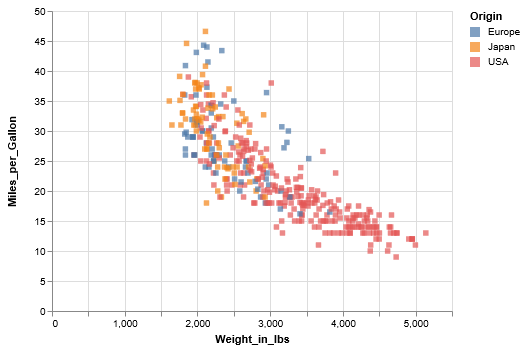

In [46]:
alt.Chart(cars).mark_square().encode(x='Weight_in_lbs', y='Miles_per_Gallon', color='Origin')

### Bar Chart of data subset

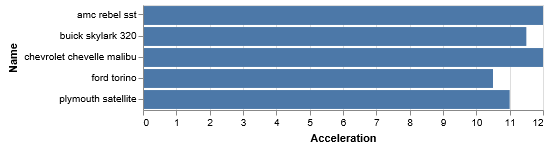

In [47]:
alt.Chart(cars[0:5]).mark_bar().encode(y='Name', x='Acceleration')

### Bar chart with aggregation over categories

In [52]:
chart = alt.Chart(cars).mark_bar(color='darkblue').encode(y='Origin', x='average(Weight_in_lbs)')

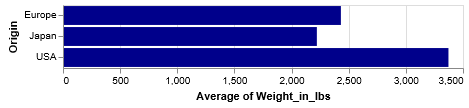

In [53]:
chart

#### Barchart with sorting of bar position

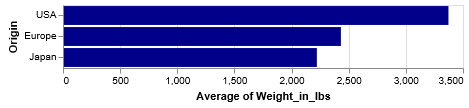

In [61]:
alt.Chart(cars).mark_bar(color='darkblue').encode(
    y=alt.Y('Origin', 
            sort=alt.SortField(field='Weight_in_lbs', order='descending', op='average') ), 
    x='average(Weight_in_lbs)')

### Saving a chart as html

In [49]:
chart.save('carbars.html', 'html')

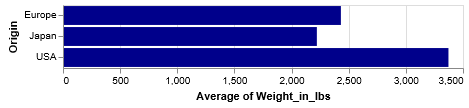

In [50]:
chart

## Stacked Area Chart

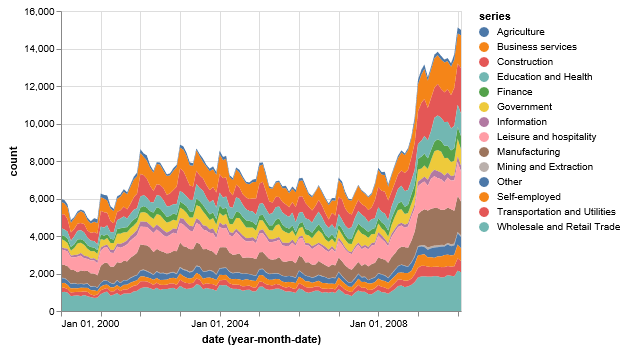

In [20]:


source = vega_datasets.data.unemployment_across_industries.url

alt.Chart(source).mark_area().encode(
    alt.X("date:T", timeUnit='yearmonthdate'),
    alt.Y("count:Q"),
    color="series:N"
)

## Area Charts with and without Stacking, and with Opacity setting

In [24]:
d = {'t':[0,0,1,1,2,2], 'y':[2,3,1,4,6,1], 'sex':['M','F','M','F','M','F',]}

In [25]:
df2 = pd.DataFrame(d)

In [26]:
df2

,sex,t,y
0,M,0,2
1,F,0,3
2,M,1,1
3,F,1,4
4,M,2,6
5,F,2,1


#### Stacked Areas

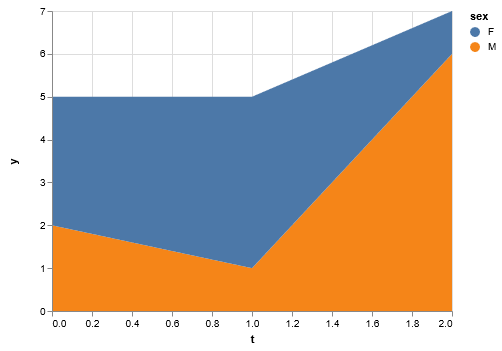

In [28]:
alt.Chart(df2).mark_area().encode(alt.X('t'),  alt.Y('y', stack='zero'), color='sex' )

#### Overlapping areas

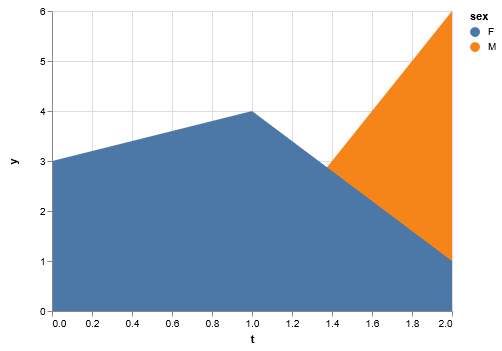

In [37]:
alt.Chart(df2).mark_area().encode(x='t',  y='y', color='sex' )

#### Areas normalized to 100%

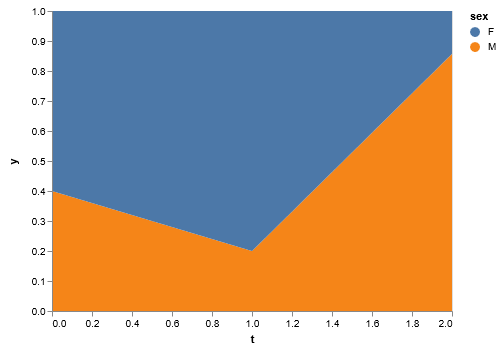

In [62]:
alt.Chart(df2).mark_area().encode(alt.X('t'),  alt.Y('y', stack='normalize'), color='sex' )

#### Areas spread around Y=0 axis

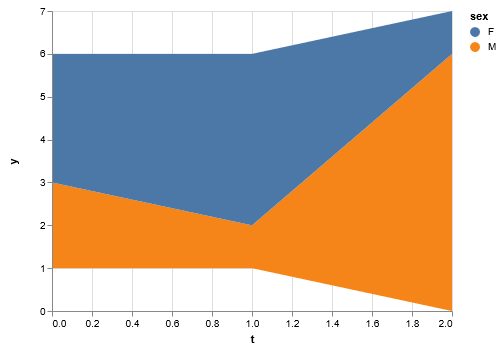

In [31]:
alt.Chart(df2).mark_area().encode(alt.X('t'),  alt.Y('y', stack='zero'), color='sex' )

#### Overlapping Areas

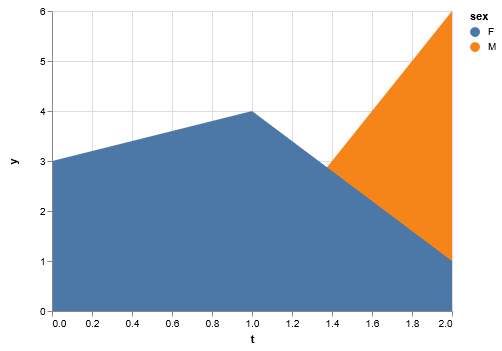

In [66]:
alt.Chart(df2).mark_area().encode(alt.X('t'),  alt.Y('y', stack=None), color='sex' )

### Setting Opacity in overlapping area chart, three different ways

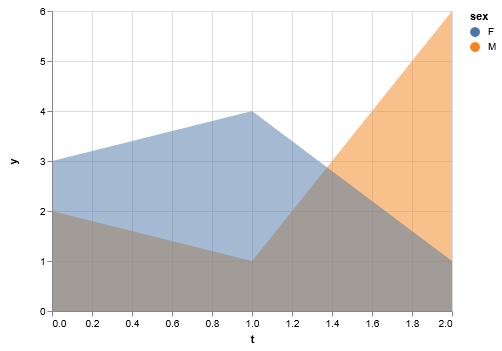

In [67]:
alt.Chart(df2).mark_area().encode(alt.X('t'),  alt.Y('y', stack=None), color='sex' ).configure_mark(opacity=0.5)

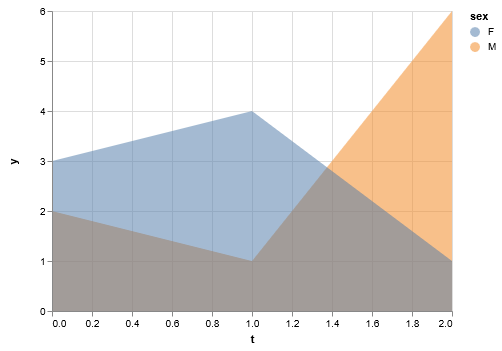

In [68]:
alt.Chart(df2).mark_area(opacity=0.5).encode(alt.X('t'),  alt.Y('y', stack=None), color='sex' )

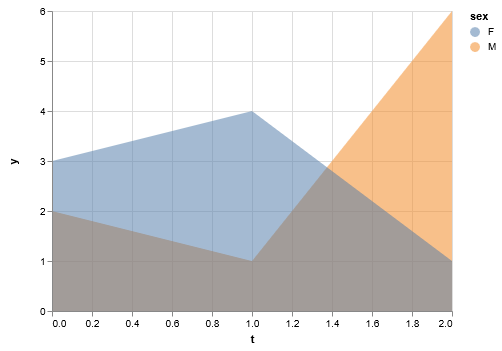

In [69]:
alt.Chart(df2).mark_area().encode(alt.X('t'),  alt.Y('y', stack=None), color='sex', opacity=alt.value(0.5) )

### Show details of Altair versions and renderers

In [8]:
alt.__version__

'2.0.1'

In [13]:
print(alt.renderers.active)

default


## Working with GeoPandas 

Note that these may generate large json image files, that block Notebook saving 

Delete cells after viewing

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world  = world[world.continent!='Antarctica'] # do not display Antarctica

data  = alt.InlineData(values = world.to_json(), #geopandas to geojson string
                       # root object type is "FeatureCollection" but we need its features
                       format = alt.DataFormat(property='features',type='json')) 
alt.Chart(data).mark_geoshape(
).encode( 
    color='properties.pop_est:Q', # DataFrame fields are accessible through a "properties" object 
    tooltip='properties.name:N'
).properties( 
    projection={"type":'mercator'},
    width=500,
    height=300
)

In [ ]:
postcode_df = gpd.\
read_file('../../GeopandasNotebookProject/data/shapefiles/POA_2011_AUST.shp')


data  = alt.InlineData(values = postcode_df.to_json(), #geopandas to geojson string
                       # root object type is "FeatureCollection" but we need its features
                       format = alt.DataFormat(property='features',type='json')) 
alt.Chart(data).mark_geoshape(
).encode( 
    color='properties.SQKM:Q', # DataFrame fields are accessible through a "properties" object 
    tooltip='properties.POA_NAME:N'
).properties( 
    projection={"type":'mercator'},
    width=500,
    height=300
)

In [5]:
print(alt.__version__)

2.1.0


### Display associated webpages (eg source of data)

In [77]:
from IPython.display import IFrame
IFrame("carbars.html", width = 800, height = 200)

In [6]:
from IPython.display import IFrame
IFrame("http://www.net-analysis.com", width = 800, height = 200)

### Save figures to figures directory

../figures/Test20170218-193200.jpg saved.


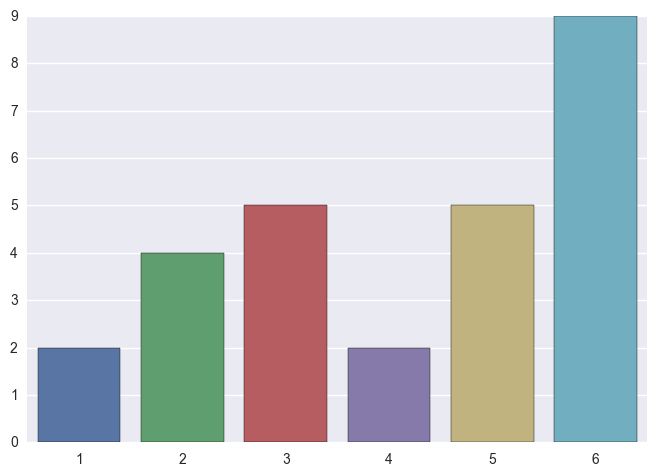

In [16]:
def save_figure(figure_title='TemplateNotebookFigure', figure_prefix='../figures/'):
    """
     save_figure:  same the current matplotlib.pyplot figure as a jpg file

     a file is generated from the supplied title, and the date and time

     Inputs:
     figure_title: string, incorporated into file name
     figure_prefix: string giving relative (or absolute) path the save location
     Returns:
     True is save OK
     False otherwise

     Outputs:
     prints error messages on exceptions

    """

    try:
        fname     = figure_prefix+figure_title+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'.jpg'
        plt.savefig(fname)
        print(fname+' saved.')
    except IOError as err:
        print('Unable to save figure - IO Error!')
        print("IO error: {0}".format(err))
    except OSError as err:
        print('Unable to save figure - OS Error!')
        print("OS error: {0}".format(err))
    except:
        print('Unable to save figure - Unexpected Error!')
        print("Unexpected error:", sys.exc_info()[0])
        raise
    #end try
#end save_figure

x         =[1,2,3,4,5,6]
y         =[2,4,5,2,5,9]
plot2     = sns.barplot(x=x, y=y)

save_figure(figure_title='Test', figure_prefix=FIGURE_PREFIX)

plt.show()

### Display images

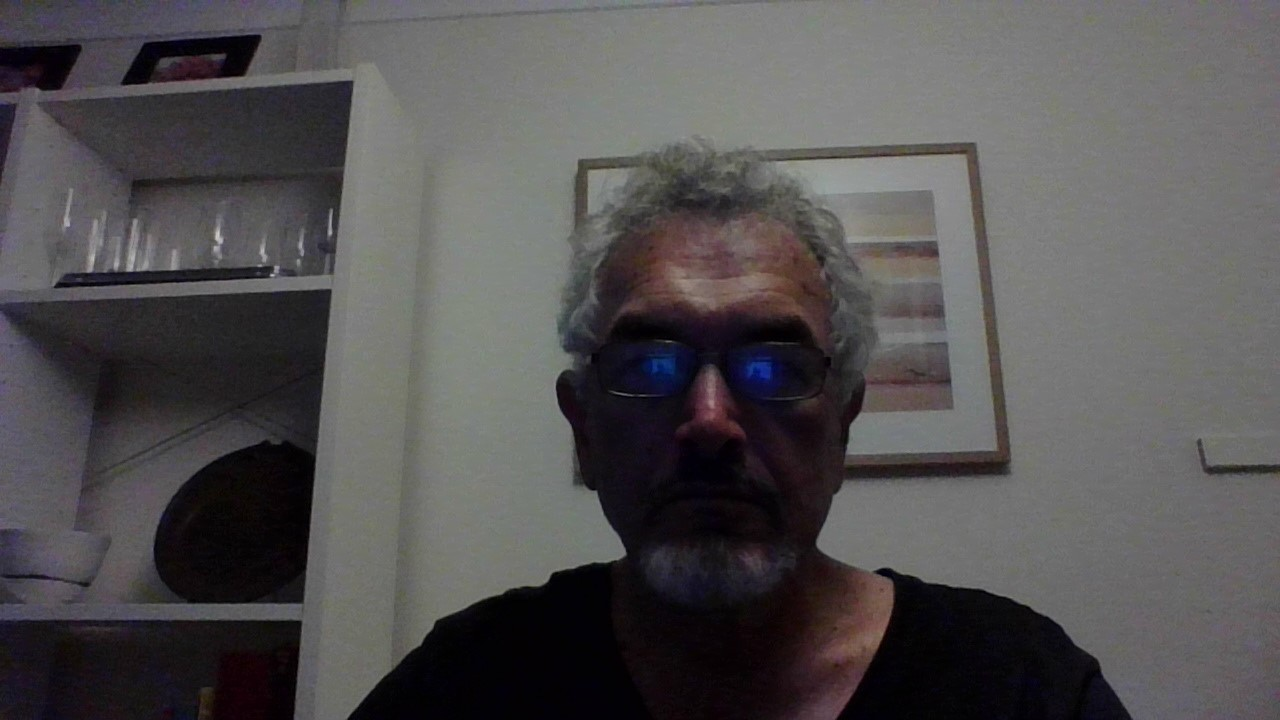

In [8]:
from IPython.display import Image
Image(filename='../figures/apc.jpg', height = 100, width = 200)

## Conclusions / Summary

In [2]:
data3 = pd.DataFrame({'x': [1, 2, 3], 'y': [2, 1, 2]})

chart3 = alt.Chart(data3).mark_line().encode(
 x='x:Q',
 y='y:Q'
)

chart3.to_dict() 

{'$schema': 'https://vega.github.io/schema/vega-lite/v2.4.3.json',
 'config': {'view': {'height': 300, 'width': 400}},
 'data': {'values': [{'x': 1, 'y': 2}, {'x': 2, 'y': 1}, {'x': 3, 'y': 2}]},
 'encoding': {'x': {'field': 'x', 'type': 'quantitative'},
  'y': {'field': 'y', 'type': 'quantitative'}},
 'mark': 'line'}